# Week 14 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [2]:
import pandas as pd
kidny_data = pd.read_csv("chronic kidney.zip")
kidny_data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [3]:
kidny_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [4]:
import numpy as np
# np.object
# Selecting cloumns which have dta type object
obj_data = kidny_data.select_dtypes(include = 'object')
obj_data.head()

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,NaN,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,38,6000,NaN,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
obj_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rbc             248 non-null    object
 1   pc              335 non-null    object
 2   pcc             396 non-null    object
 3   ba              396 non-null    object
 4   pcv             330 non-null    object
 5   wc              295 non-null    object
 6   rc              270 non-null    object
 7   htn             398 non-null    object
 8   dm              398 non-null    object
 9   cad             398 non-null    object
 10  appet           399 non-null    object
 11  pe              399 non-null    object
 12  ane             399 non-null    object
 13  classification  400 non-null    object
dtypes: object(14)
memory usage: 43.9+ KB


In [6]:
# check the values of each row for each column
unique_value_dict = {}

for i in obj_data.columns:
    unique_value_dict[i] = obj_data[i].unique().__len__()
    print(i,"\t",obj_data[i].unique().__len__(),"\t",obj_data[i].dtype)

print("\n","",max(unique_value_dict,key = lambda x : unique_value_dict[x]))

rbc 	 3 	 object
pc 	 3 	 object
pcc 	 3 	 object
ba 	 3 	 object
pcv 	 45 	 object
wc 	 93 	 object
rc 	 50 	 object
htn 	 3 	 object
dm 	 6 	 object
cad 	 4 	 object
appet 	 3 	 object
pe 	 3 	 object
ane 	 3 	 object
classification 	 3 	 object

  wc


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [7]:
def redundancy_finder(data):
    for i in data.columns:
        # print(i,"\t",data[i].unique().__len__(),"\t",data[i].dtype)
        if data[i].unique().__len__() == 1:
            print(i)
    else:
        print("No redundancy fouund")

redundancy_finder(kidny_data)

No redundancy fouund


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

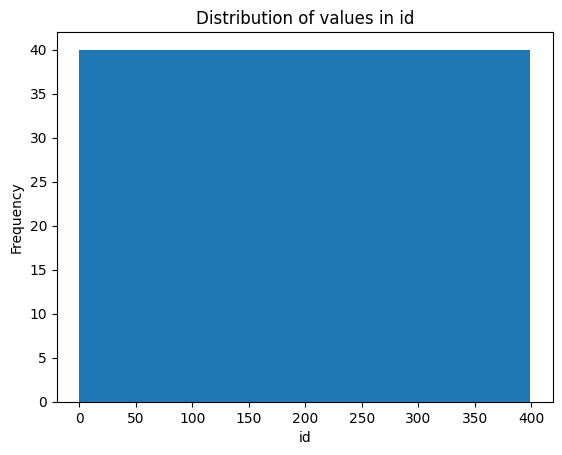

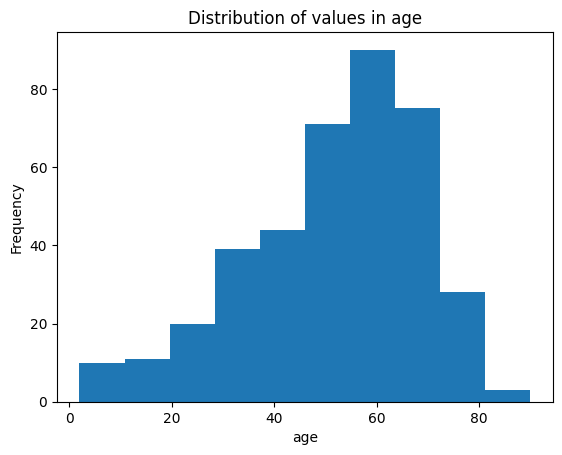

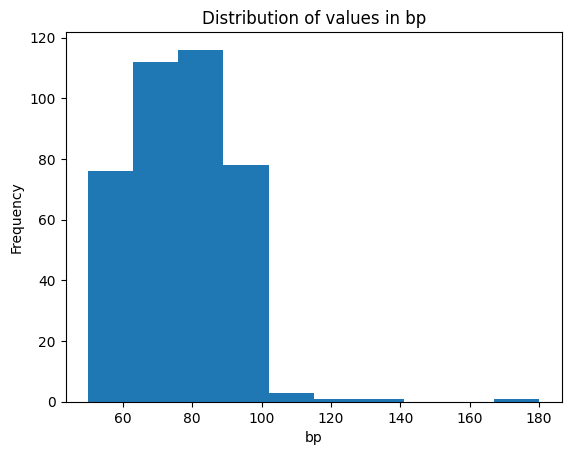

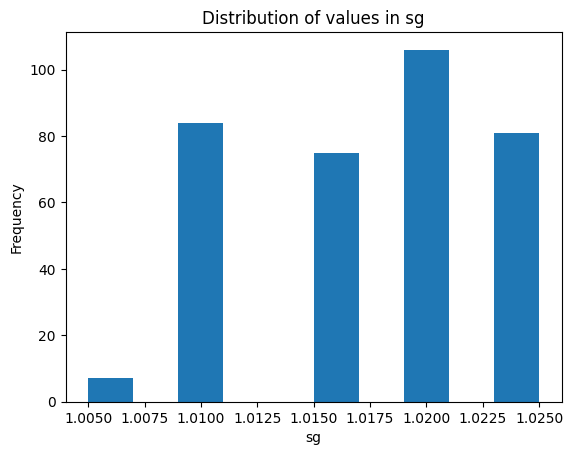

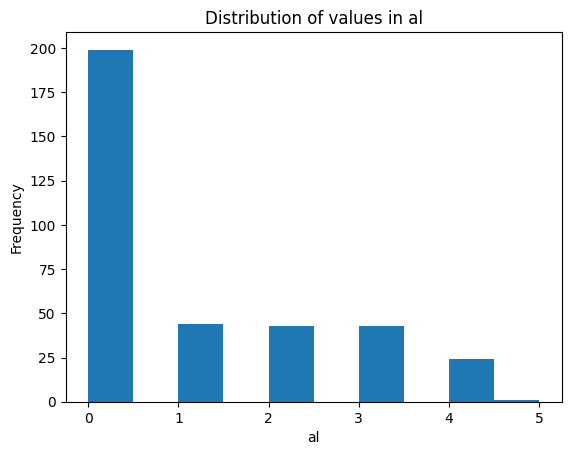

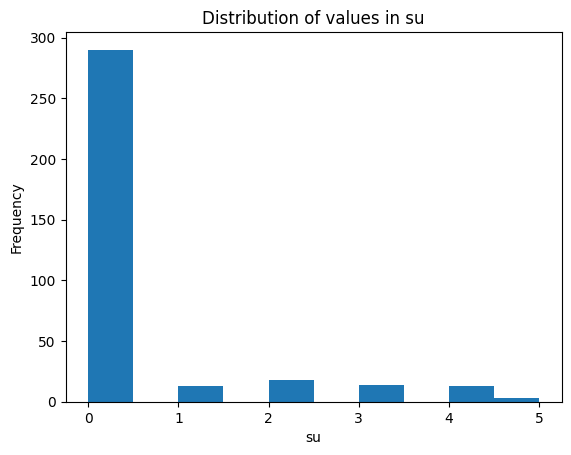

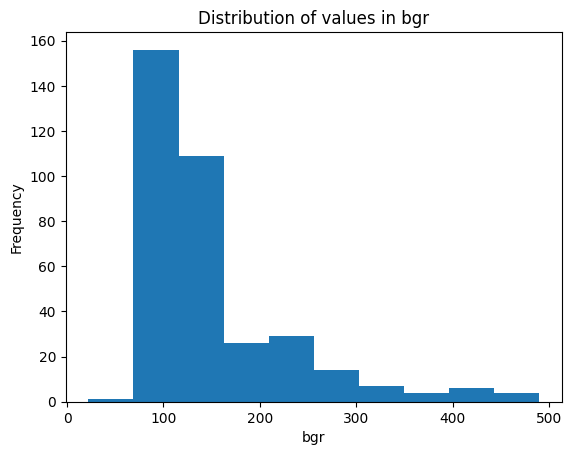

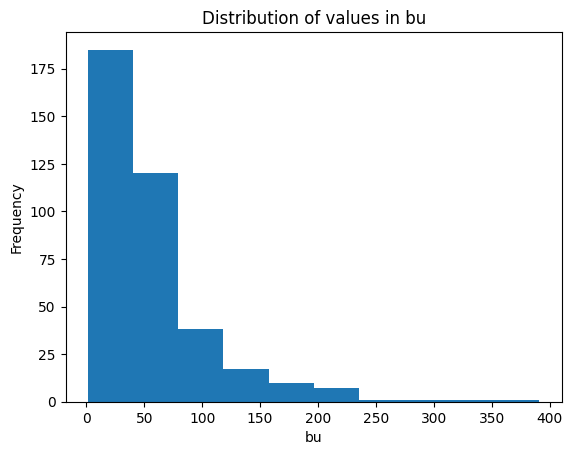

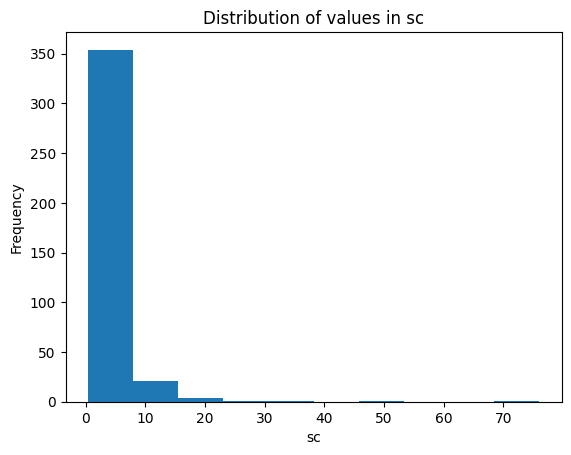

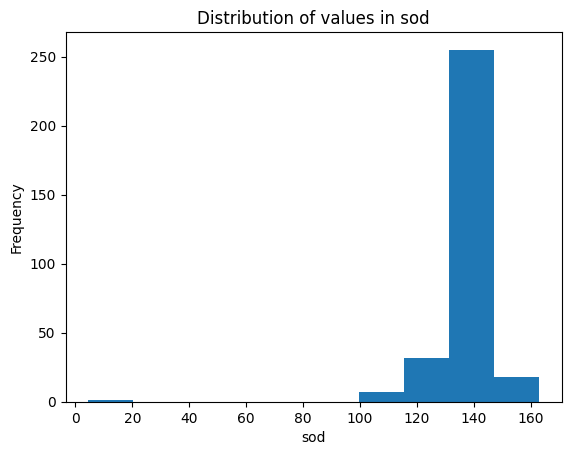

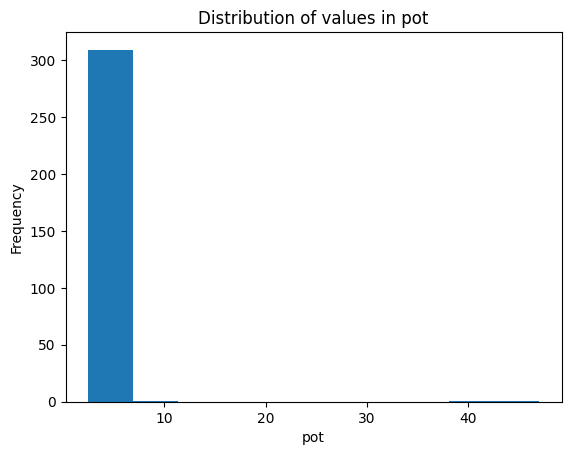

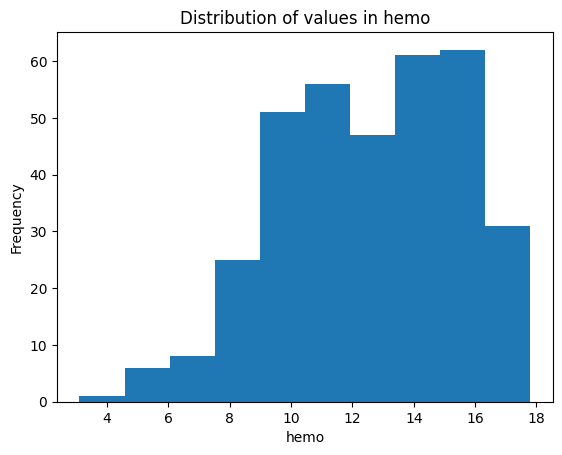

In [8]:
import matplotlib.pyplot as plt
numeric_columns  = kidny_data.select_dtypes(include=['int64', 'float64'])
if numeric_columns.empty:
    print('No numeric columns found')
else :
    # Get the first numeric column
    for numeric_column in numeric_columns.columns:

        # Create a histogram of the values in the numeric column
        plt.hist(kidny_data[numeric_column])
        plt.xlabel(numeric_column)
        plt.ylabel('Frequency')
        plt.title('Distribution of values in {}'.format(numeric_column))
        plt.show()

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

In [9]:

kidny_data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


<Axes: >

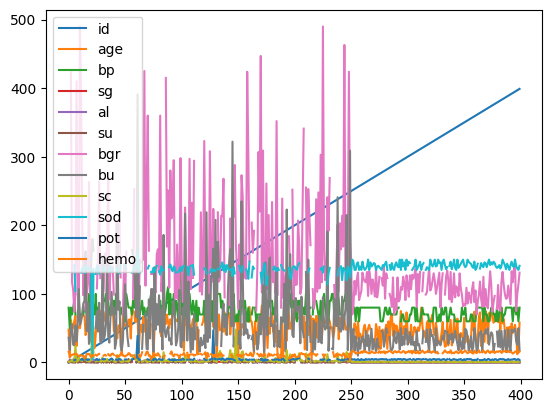

In [10]:

kidny_data.plot()



---



## Submitting Your Work

Submit your work as usual.